## HYPOTHESIS BUILDING

#### 1. Has the network latency gone up since we switched internet service providers?

In [5]:
# Ho = Network latency is not longer than before with the new internet service provider.
# Hα = Network latency is longer than before with the new internet service provider.
# True Positive = Low p-value, narrow confidence interval, drop in average latency with new internet service provider than with the previous internet service provider.
# True Negative = There is no difference in the average latencies with or without the new internet service provider. OR, the average latency is less with the new one
# Type I Error = There are other factors causing *temporary* slower internet (weather)
# Type II Error = There are other services slowing down the internet service (large apps running in background)

#### 2. Is the website design any good?

In [6]:
# Ho = Customers are not making more purchases with the new website design.
# Hα = Customers are making more purchases with the new website design.
# True Positive = Low p-value, narrow confidence interval, same rate of new customers and churn, increased rate of purchases being made
# True Negative = same rate of new customers and churn, rate of purchases is unchanged or lowers
# Type I Error = reject null but true, redesign launched for new company, increase in sales was only increase in general popularity
# Type II Error = accept null but false, redesign launched during pandemic, steady or decrease in sales due to market crashing

#### 3. Is our television ad driving more sales?

In [7]:
# Ho = Customers are making more purchases because of our television ad 
# Hα = Customers are not making more purchases becasue of our television ad
# True Positive = Low p-value, narrow confidence interval, customers are completing survey during checkout that they heard about our products via tv ad 
# True Negative = customers are completeing survey during checkout that they heard about our products via any other method
# Type I Error = reject null but true, increase in feedback about the tv ad due to top (fastest) option in checkout survey
# Type II Error = accept null but false, people are watching regular tv less and less, might not reach target audience

## T-TEST

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

#### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
cust1 = 40
μ1 = 90
σ1 = 15
cust2 = 50
μ2 = 100
σ2 = 20
α = .05

sales1 = stats.norm(μ1, σ1)
sales2 = stats.norm(μ2, σ2)

In [3]:
bus1 = sales1.rvs(cust1)
bus2 = sales2.rvs(cust2)

<AxesSubplot:ylabel='Count'>

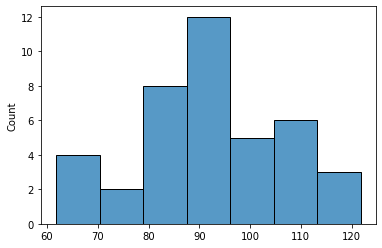

In [4]:
sns.histplot(bus1)

<AxesSubplot:ylabel='Count'>

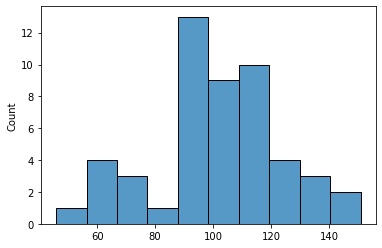

In [5]:
sns.histplot(bus2)

In [6]:
bus1.mean(), bus2.mean()

(92.30766445368805, 101.57527916840425)

In [7]:
# two sample, two tail

In [8]:
# check variance
s, p = stats.levene(bus1, bus2)

In [9]:
# variance not similar
p < α

False

In [10]:
t, p = stats.ttest_ind(bus1, bus2)

In [11]:
p < α

True

In [12]:
# reject null hypothesis
# the average time it takes to sell the homes between the two offices is significantly different

In [37]:
## ANOTHER WAY
t, p = stats.ttest_ind_from_stats(μ1, σ1, cust1, μ2, σ2, cust2)

In [38]:
p < α

True

#### 2. Load the mpg dataset and use it to answer the following questions:

In [39]:
mpg = pd.DataFrame(data('mpg'))
mpg['fuel_eff'] = (mpg.cty + mpg.hwy)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


##### 2.a Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [40]:
# 2 samples, 2 tails

In [41]:
eight = mpg[mpg.year == 2008].fuel_eff
nine = mpg[mpg.year == 1999].fuel_eff

<AxesSubplot:xlabel='fuel_eff', ylabel='Count'>

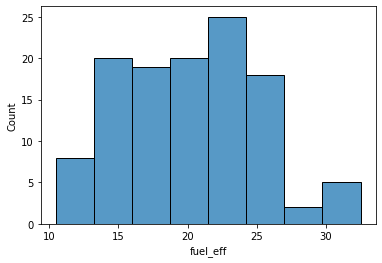

In [42]:
sns.histplot(eight)

<AxesSubplot:xlabel='fuel_eff', ylabel='Count'>

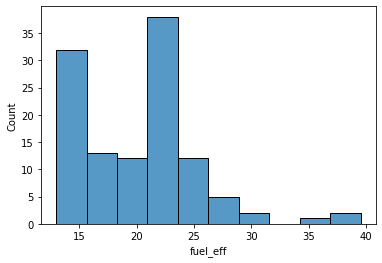

In [43]:
sns.histplot(nine)

In [44]:
eight.mean(), nine.mean()

(20.076923076923077, 20.22222222222222)

In [45]:
α = 0.05

In [46]:
# check for variance
s, p = stats.levene(eight, nine)

In [47]:
# variance is similar
p < α

False

In [48]:
t, p = stats.ttest_ind(eight, nine)

In [49]:
p < α

False

In [50]:
# there is not a difference in fuel efficiency between 2008 and 1999 vehicles
# accept null hypothesis

##### 2.b Are compact cars more fuel-efficient than the average car?

In [51]:
# 1 sample, 1 tail

In [52]:
compact = mpg[mpg['class'] == 'compact'].fuel_eff
μth = mpg.fuel_eff.mean()

In [53]:
t, p = stats.ttest_1samp(compact, μth)

In [54]:
p/2 < α, t > 0

(True, True)

In [55]:
# reject null hypothesis

##### 2.c Do manual cars get better gas mileage than automatic cars?

In [56]:
# 2 sample, 1 tail

In [57]:
manual = mpg[mpg['trans'].str.contains('manual')].fuel_eff
auto = mpg[mpg['trans'].str.contains('auto')].fuel_eff

In [58]:
#check variance
s, p = stats.levene(manual, auto)

In [59]:
# variance not similar
p < α

False

In [60]:
t, p = stats.ttest_ind(manual, auto)

In [61]:
p < α, t > 0

(True, True)

In [62]:
# reject the null hypothesis

## CORRELATION

## CHI SQUARE